
# Definição do Problema

---
## Descrição do Problema

A Netflix, como líder global em streaming, possui um vasto catálogo de títulos que varia ao longo do tempo em relação a gêneros, países de origem, classificações indicativas e tipo de conteúdo.  
O objetivo aqui é entender como essas características evoluem no tempo pode ajudar a identificar **lacunas de conteúdo**, **picos de adição** e **tendências de consumo**.

**Problema de negócio:**  
A equipe de Netflix deseja otimizar a estratégia de aquisição de títulos ao entender melhor **quais tipos de conteúdo são mais populares em determinados períodos** e quais **gêneros estão sub-representados** no catálogo atual.

---
## Tipo de Problema

Este é um problema de **aprendizado não supervisionado** no contexto de análise exploratória e pré-processamento de dados.  
Para isso, irei extraior padrões, tendências e insights a partir da estrutura e distribuição dos dados.

---
## Premissas

- Os dados refletem fielmente os títulos disponíveis na plataforma até o momento da coleta.
- Campos como duração, país e classificação indicativa podem conter inconsistências ou omissões, que serão tratados. Em muitos casos, falta de dados em algumas colunas.
- A presença ou ausência de determinados gêneros e países pode refletir decisões de negócio ou limitações contratuais.

---
## Atributos do Dataset - Netflix

| Atributo            | Descrição |
|---------------------|-----------|
| `show_id`           | Identificador único do conteúdo |
| `type`              | Tipo de conteúdo (Movie ou TV Show) |
| `title`             | Título do conteúdo |
| `director`          | Nome do(s) diretor(es) |
| `cast`              | Lista de atores principais |
| `country`           | País(es) de origem |
| `date_added`        | Data de adição à plataforma |
| `release_year`      | Ano de lançamento original |
| `rating`            | Classificação indicativa |
| `duration`          | Duração em minutos (filmes) ou temporadas (séries) |
| `listed_in`         | Lista de gêneros associados |
| `description`       | Descrição curta do conteúdo |
| `year_added`        | Ano extraído de `date_added` |
| `month_added`       | Mês extraído de `date_added` |
| `release_decade`    | Década de lançamento |
| `duration_minutes`  | Duração convertida para minutos (filmes) |
| `num_seasons`       | Número de temporadas (séries) |

---
## Objetivo Final do Projeto

Identificar padrões e lacunas no catálogo da Netflix para subsidiar decisões estratégicas da equipe de curadoria, com foco em:
- Gêneros com alta ou baixa representação;
- Evolução temporal por tipo de conteúdo;
- Duração média de filmes e séries;
- Distribuição de classificação indicativa por tipo.

---
## Fonte de dados do Projeto
**Dataset utilizado:** Netflix Movies and TV Shows (Kaggle)  
**Link:** https://www.kaggle.com/datasets/shivamb/netflix-shows  

### Imports, lista de atributos e carga dos dados no dataframe

In [17]:
#importando as libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder



# url onde esta a fonte de dados
url_dados = 'https://raw.githubusercontent.com/guiagb/mvp-anld-puc/refs/heads/main/netflix_titles.csv'

# labels dos atributos do dataset - Netflix
labels_atributos = [
    'show_id',         # Identificador único do conteúdo
    'type',            # Tipo de conteúdo (Movie ou TV Show)
    'title',           # Título da obra
    'director',        # Nome do diretor
    'cast',            # Elenco principal
    'country',         # País de origem
    'date_added',      # Data de adição ao catálogo da Netflix
    'release_year',    # Ano de lançamento
    'rating',          # Classificação indicativa
    'duration',        # Duração (minutos para filmes ou número de temporadas para séries)
    'listed_in',       # Gêneros e categorias atribuídas
    'description'      # Descrição textual do conteúdo
]

# carga do dataset através da url onde esta a fonte dos dados - Netflix
df = pd.read_csv(url_dados, names=labels_atributos)


### Atributos e instâncias existentes


In [18]:
# exibe quantos atributos e instancias existem no dataframe
num_instancias, num_atributos = df.shape

print(f"Quantidade de instâncias (linhas): {num_instancias}")
print(f"Quantidade de atributos (colunas): {num_atributos}")

Quantidade de instâncias (linhas): 8808
Quantidade de atributos (colunas): 12


### Tipos de dados dos atributos

In [19]:
# exibe o tipo de dados de cada atributo
print("Tipos de dados dos atributos:\n")
print(df.dtypes)

Tipos de dados dos atributos:

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year    object
rating          object
duration        object
listed_in       object
description     object
dtype: object


### Conteúdo dos atributos

In [20]:
# 5 primeiras linhas do dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
4,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


### Valores faltantes por atributos

In [21]:
# valores faltantes
print("Valores faltantes por coluna:")
print(df.isnull().sum())

# porcentagem de missing
print("\nPorcentagem de valores faltantes:")
print((df.isnull().mean() * 100).round(2))

# valores únicos em colunas-chave para identificar inconsistências
print("\nExemplos de valores únicos em 'rating':")
print(df['rating'].value_counts(dropna=False))

print("\nExemplos de valores únicos em 'duration':")
print(df['duration'].value_counts(dropna=False).head(10))


Valores faltantes por coluna:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Porcentagem de valores faltantes:
show_id          0.00
type             0.00
title            0.00
director        29.90
cast             9.37
country          9.43
date_added       0.11
release_year     0.00
rating           0.05
duration         0.03
listed_in        0.00
description      0.00
dtype: float64

Exemplos de valores únicos em 'rating':
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NaN            4
UR             3
NC-17          3
rating         1
66 min         1
74 min         1
84 min         1
Name: count, dtype: 

### Resumo estatístico dos atributos - valores em missing

In [22]:
# garante que release_year esteja em formato numérico
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


# calcular estatísticas descritivas para release_year
ano = df['release_year']

print("Resumo estatístico - release_year:")
print(f"Mínimo: {ano.min()}")
print(f"Máximo: {ano.max()}")
print(f"Mediana: {ano.median()}")
print(f"Moda: {ano.mode().values[0]}")
print(f"Média: {ano.mean():.2f}")
print(f"Desvio padrão: {ano.std():.2f}")

Resumo estatístico - release_year:
Mínimo: 1925.0
Máximo: 2021.0
Mediana: 2017.0
Moda: 2018.0
Média: 2014.18
Desvio padrão: 8.82


/tmp/ipython-input-22-1437320842.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


### Distribuição de cada atributo

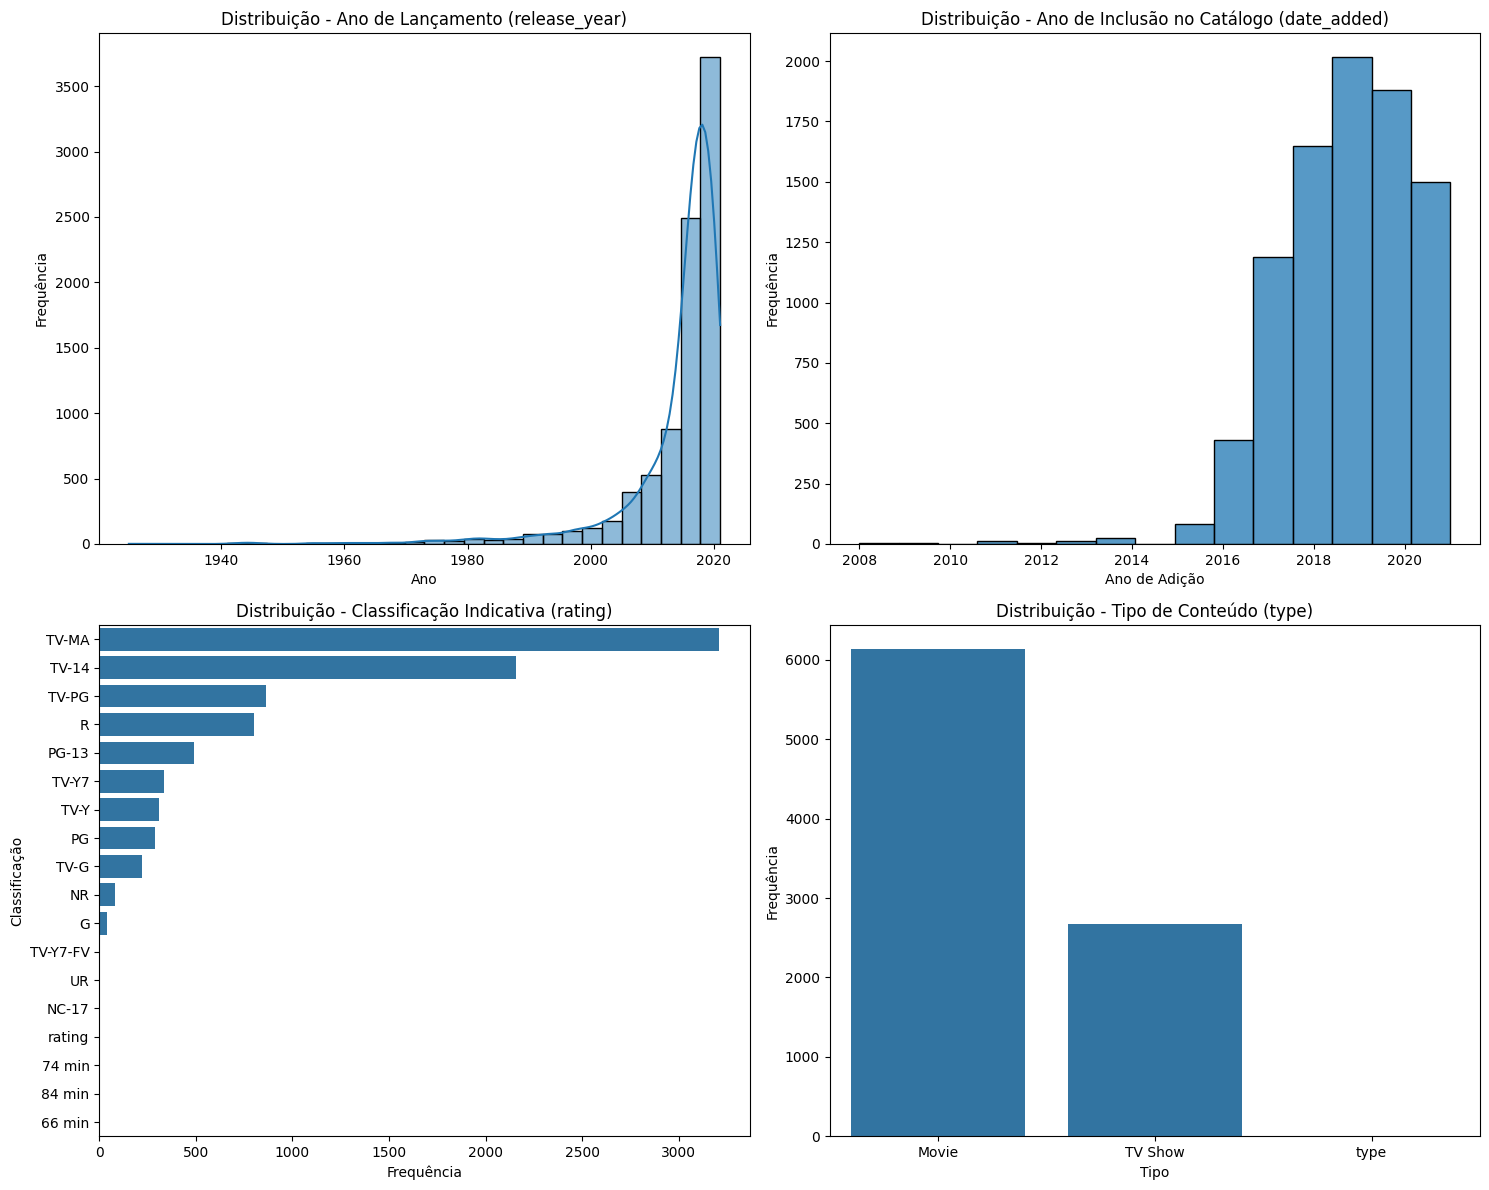

In [23]:
# plota distribuições
plt.figure(figsize=(15, 12))

# release_year
plt.subplot(2, 2, 1)
sns.histplot(df['release_year'].dropna(), bins=30, kde=True)
plt.title('Distribuição - Ano de Lançamento (release_year)')
plt.xlabel('Ano')
plt.ylabel('Frequência')

# date_added (ano)
plt.subplot(2, 2, 2)
sns.histplot(df['date_added'].dt.year.dropna(), bins=15, kde=False)
plt.title('Distribuição - Ano de Inclusão no Catálogo (date_added)')
plt.xlabel('Ano de Adição')
plt.ylabel('Frequência')

# rating
plt.subplot(2, 2, 3)
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index)
plt.title('Distribuição - Classificação Indicativa (rating)')
plt.xlabel('Frequência')
plt.ylabel('Classificação')

# type
plt.subplot(2, 2, 4)
sns.countplot(x=df['type'], order=df['type'].value_counts().index)
plt.title('Distribuição - Tipo de Conteúdo (type)')
plt.xlabel('Tipo')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


Distribuição percentual da variável de classe (type):
type
Movie      69.61
TV Show    30.38
type        0.01
Name: count, dtype: float64


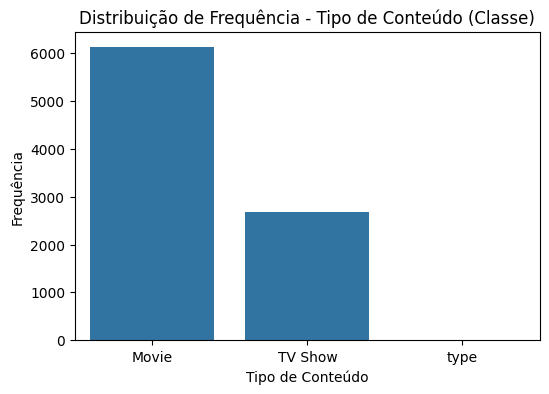

In [24]:
# conta os valores da variável de classe
classe = df['type'].value_counts()
classe_percentual = (classe / classe.sum() * 100).round(2)

# exibe percentuais no console
print("Distribuição percentual da variável de classe (type):")
print(classe_percentual)

# gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=classe.index, y=classe.values)
plt.title('Distribuição de Frequência - Tipo de Conteúdo (Classe)')
plt.xlabel('Tipo de Conteúdo')
plt.ylabel('Frequência')
plt.show()

In [25]:
# converter year_added para no e month_added pasra mês
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# remove nulos
df_numerico = df[['release_year', 'year_added']].dropna()

# Min-Max
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_numerico), columns=['release_year_norm', 'year_added_norm'])

# padronização
scaler_std = StandardScaler()
df_zscore = pd.DataFrame(scaler_std.fit_transform(df_numerico), columns=['release_year_z', 'year_added_z'])

# décadas de lançamento
df['release_decade'] = (df['release_year'] // 10) * 10

# One-Hot Encoding (para 'type' e 'rating')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[['type', 'rating']].fillna('desconhecido'))
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['type', 'rating']))

# Reseta os índices para merge
df_transf = pd.concat([
    df.reset_index(drop=True),
    df_minmax.reset_index(drop=True),
    df_zscore.reset_index(drop=True),
    encoded_df.reset_index(drop=True)
], axis=1)

# exibir uma amostra dos dados após pre-processamento
df_transf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,rating_desconhecido,rating_rating
0,show_id,type,title,director,cast,country,NaT,NaN,rating,duration,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020.0,PG-13,90 min,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021.0,TV-MA,1 Season,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021.0,TV-MA,1 Season,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Correlação de variáveis numéricas

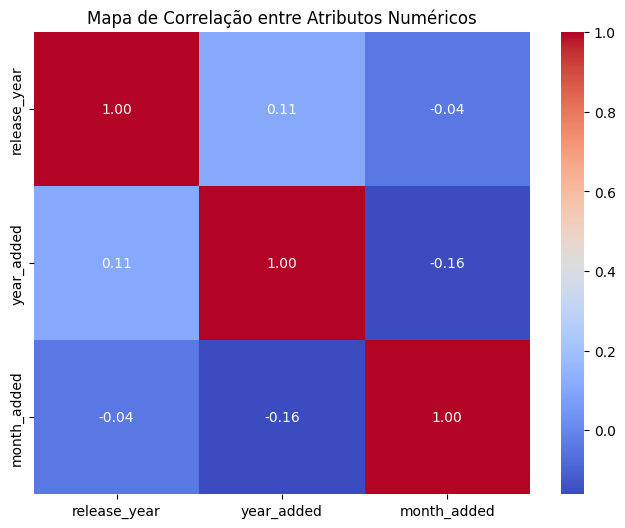

In [26]:
# correlação entre variáveis numéricas
numericas = df[['release_year', 'year_added', 'month_added']].dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(numericas.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação entre Atributos Numéricos")
plt.show()


### Eliminação dos nulos

In [27]:
# drop dos nulos
df = df.dropna()

In [28]:
# valores faltantes
print("Valores faltantes por coluna:")
print(df.isnull().sum())

# porcentagem de missing
print("\nPorcentagem de valores faltantes:")
print((df.isnull().mean() * 100).round(2))

# valores únicos em colunas-chave para identificar inconsistências
print("\nExemplos de valores únicos em 'rating':")
print(df['rating'].value_counts(dropna=False))

print("\nExemplos de valores únicos em 'duration':")
print(df['duration'].value_counts(dropna=False).head(10))


Valores faltantes por coluna:
show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
year_added        0
month_added       0
release_decade    0
dtype: int64

Porcentagem de valores faltantes:
show_id           0.0
type              0.0
title             0.0
director          0.0
cast              0.0
country           0.0
date_added        0.0
release_year      0.0
rating            0.0
duration          0.0
listed_in         0.0
description       0.0
year_added        0.0
month_added       0.0
release_decade    0.0
dtype: float64

Exemplos de valores únicos em 'rating':
rating
TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17   

### Transformações dos dados

In [29]:
# cria coluna com a década de lançamento
df['release_decade'] = (df['release_year'] // 10) * 10

# extrai duração numérica
def extrair_duracao(valor):
    if 'min' in valor:
        return int(valor.replace(' min', ''))
    elif 'Season' in valor:
        return int(valor.split()[0])
    return None

# aplica a função e separa entre minutos e temporadas
df['duration_int'] = df['duration'].apply(extrair_duracao)
df['duration_minutes'] = df.apply(lambda x: x['duration_int'] if x['type'] == 'Movie' else None, axis=1)
df['num_seasons'] = df.apply(lambda x: x['duration_int'] if x['type'] == 'TV Show' else None, axis=1)

# remove coluna auxiliar
df.drop(columns=['duration_int'], inplace=True)

# visualizar amostra final
df.head()

/tmp/ipython-input-29-3246461748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_decade'] = (df['release_year'] // 10) * 10
/tmp/ipython-input-29-3246461748.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_int'] = df['duration'].apply(extrair_duracao)
/tmp/ipython-input-29-3246461748.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,release_decade,duration_minutes,num_seasons
8,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993.0,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,9.0,1990.0,125.0,NaN
9,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021.0,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,9.0,2020.0,NaN,9.0
10,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021.0,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021.0,9.0,2020.0,104.0,NaN
13,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021.0,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021.0,9.0,2020.0,127.0,NaN
25,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998.0,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021.0,9.0,1990.0,166.0,NaN


In [30]:
# exibe todos os atributos finais
print(df.columns.tolist())

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description', 'year_added', 'month_added', 'release_decade', 'duration_minutes', 'num_seasons']


### Exibindo novas distribuições

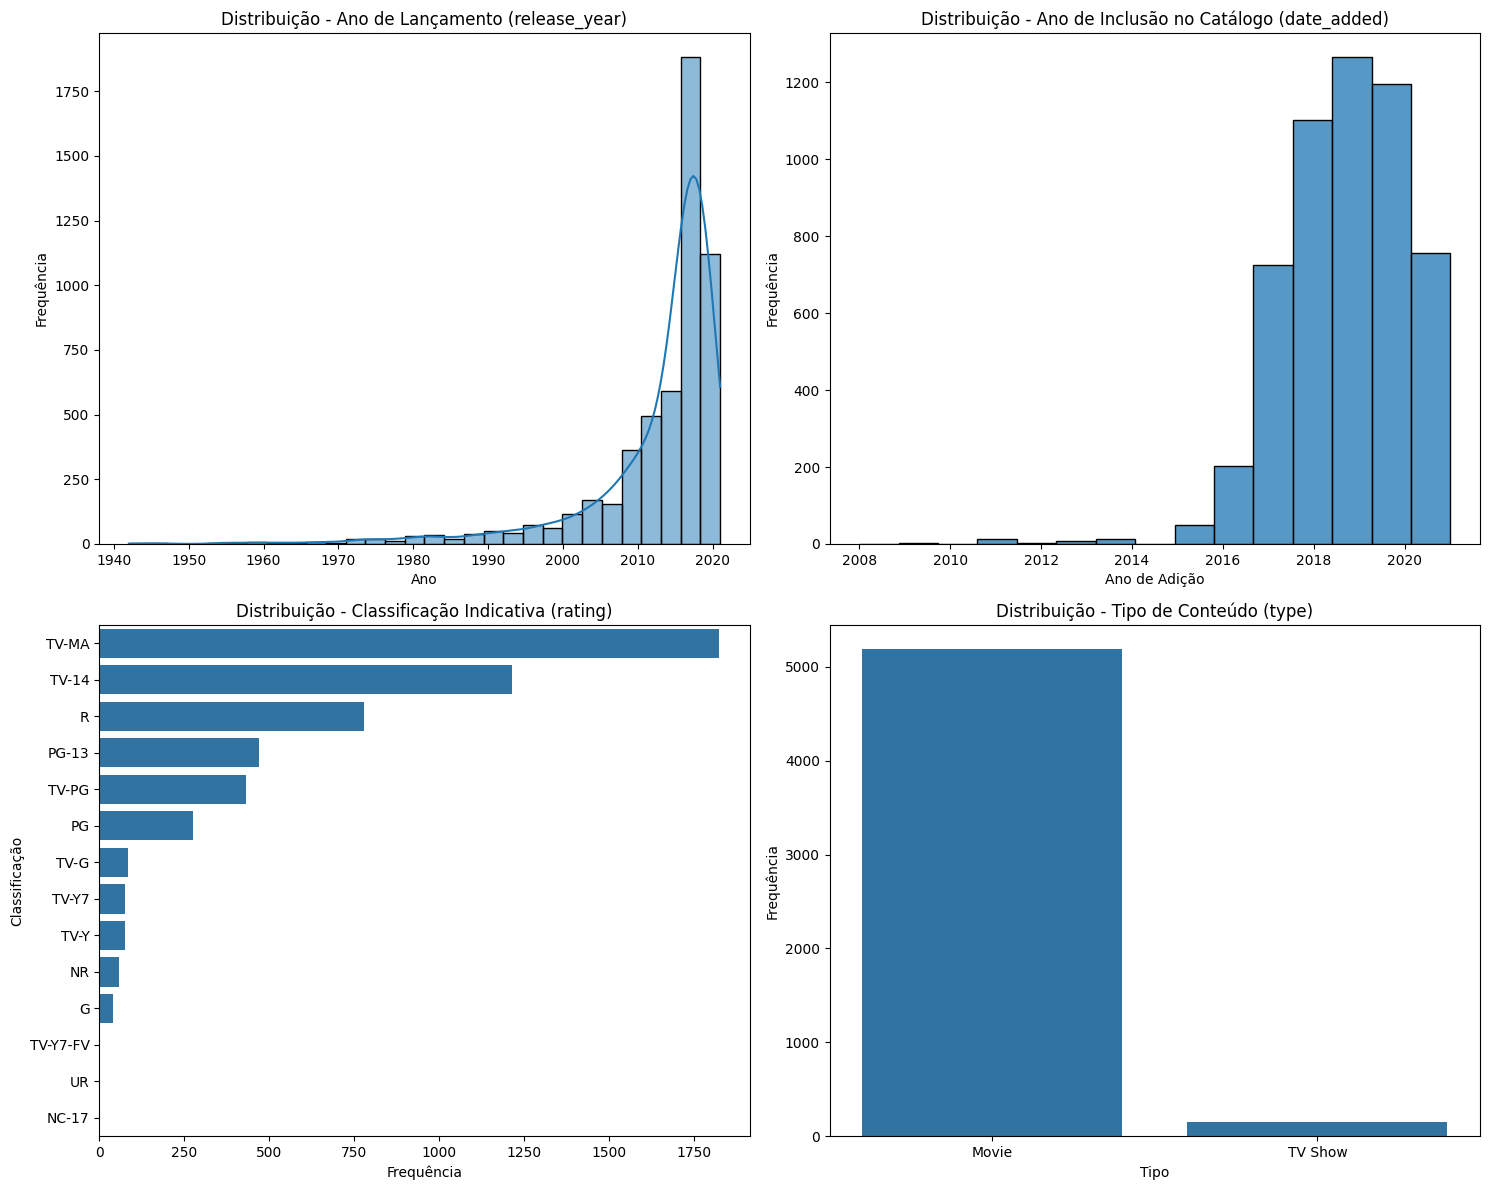

In [31]:
# plota as distribuições
plt.figure(figsize=(15, 12))

# release_year
plt.subplot(2, 2, 1)
sns.histplot(df['release_year'].dropna(), bins=30, kde=True)
plt.title('Distribuição - Ano de Lançamento (release_year)')
plt.xlabel('Ano')
plt.ylabel('Frequência')

# date_added (ano)
plt.subplot(2, 2, 2)
sns.histplot(df['date_added'].dt.year.dropna(), bins=15, kde=False)
plt.title('Distribuição - Ano de Inclusão no Catálogo (date_added)')
plt.xlabel('Ano de Adição')
plt.ylabel('Frequência')

# rating
plt.subplot(2, 2, 3)
sns.countplot(y=df['rating'], order=df['rating'].value_counts().index)
plt.title('Distribuição - Classificação Indicativa (rating)')
plt.xlabel('Frequência')
plt.ylabel('Classificação')

# type
plt.subplot(2, 2, 4)
sns.countplot(x=df['type'], order=df['type'].value_counts().index)
plt.title('Distribuição - Tipo de Conteúdo (type)')
plt.xlabel('Tipo')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()



# Conclusão e Resposta ao Problema de Negócio

Com base na análise exploratória realizada no notebook sobre o catálogo da Netflix, foi possível identificar importantes padrões e insights, como por exemplo:

- **Distribuição de Tipo de Conteúdo:** Aproximadamente 70% dos títulos são filmes, enquanto apenas 30% são séries. Isso pode indicar uma oportunidade de **expandir o catálogo de séries**, especialmente considerando o comportamento de tipos de conteúdo e fidelização por meio de temporadas.

- **Tendência Temporal:** Observa-se um crescimento na adição de títulos nos anos de 2019 e 2020, com redução posterior, possivelmente relacionada à pandemia.

- **Classificação Indicativa:** A maioria dos títulos possui classificação voltada ao público geral (TV-MA, TV-14, PG-13), com **pouca representação de conteúdo infantil e pré-adolescente**. Isso evidencia uma **lacuna no catálogo voltado ao público mais jovem**, o que pode representar uma oportunidade de diferenciação e retenção familiar.

- **Duração Média:** A maioria dos filmes se concentra entre 80 e 120 minutos, e séries possuem entre 1 e 3 temporadas. Essa homogeneidade pode indicar que **há espaço para explorar novos formatos de séries mais longas** ou minisséries que engajem usuários por mais tempo.

- **Gêneros Mais Frequentes:** Drama, Comédia e Documentários dominam os gêneros. Gêneros como "Kids", "Science & Nature" e "International" aparecem menos, o que pode indicar uma **oportunidade para diversificação de conteúdo** em regiões ou nichos pouco explorados.

---

## Recomendação Final

A análise reforça a necessidade da Netflix **diversificar seu catálogo em três dimensões estratégicas**:
1. **Aumentar a proporção de séries**, especialmente em gêneros populares e para o público jovem.
2. **Explorar conteúdos de classificação infantil** para conquistar e reter famílias.
3. **Equilibrar os gêneros e países de origem**, aproveitando espaços pouco explorados para se destacar frente à concorrência.

Essas ações podem melhorar a retenção, aumentar o tempo médio de visualização e fortalecer a posição da Netflix em mercados subaproveitados.
